In [2]:

!unzip /content/sample_data/dogs-vs-cats-redux-kernels-edition.zip 
!unzip 'test.zip'

!unzip 'train.zip'

!mkdir train/{dog,cat}
!find train -maxdepth 1 -type f | grep 'dog' | xargs -I{} mv {} train/dog
!find train -maxdepth 1 -type f | grep 'cat' | xargs -I{} mv {} train/cat

!mkdir test/images
!find test -maxdepth 1 -type f | xargs -I{} mv {} test/images

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      
  inflating: train/dog.5521.jpg      
  inflating: train/dog.5522.jpg      

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import pathlib

In [5]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [11]:
train_dir = './train'
total_train = len(os.listdir('./train/dog')) + len(os.listdir('./train/cat'))
total_test = len(os.listdir('./test/images/'))
validation_split = 0.2

batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMAGE_CHANNELS=3

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           validation_split=validation_split)
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           batch_size=batch_size,
                                                           shuffle=True,
                                                           subset='training')
val_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           batch_size=batch_size,
                                                           shuffle=True,
                                                           subset='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)       

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)       

In [23]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    steps_per_epoch=(total_train * (1 - validation_split) // batch_size),
    validation_steps=(total_train * validation_split // batch_size)
)

Epoch 1/10
156/156 [==============================] - 1242s 8s/step - loss: 0.8048 - accuracy: 0.6394 - val_loss: 1.2922 - val_accuracy: 0.5040
Epoch 2/10
156/156 [==============================] - 1237s 8s/step - loss: 0.5209 - accuracy: 0.7515 - val_loss: 1.3577 - val_accuracy: 0.5016
Epoch 3/10
156/156 [==============================] - 1233s 8s/step - loss: 0.4137 - accuracy: 0.8098 - val_loss: 0.9393 - val_accuracy: 0.5861
Epoch 4/10
156/156 [==============================] - 1231s 8s/step - loss: 0.3639 - accuracy: 0.8434 - val_loss: 0.8209 - val_accuracy: 0.6154
Epoch 5/10
156/156 [==============================] - 1233s 8s/step - loss: 0.3417 - accuracy: 0.8559 - val_loss: 0.4492 - val_accuracy: 0.7889
Epoch 6/10
156/156 [==============================] - 1233s 8s/step - loss: 0.2745 - accuracy: 0.8824 - val_loss: 0.4333 - val_accuracy: 0.8213
Epoch 7/10
156/156 [==============================] - 1232s 8s/step - loss: 0.2250 - accuracy: 0.9108 - val_loss: 0.5457 - val_accuracy:

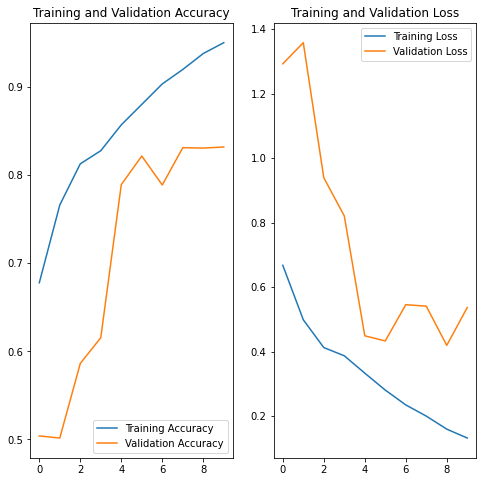

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(directory='./test/',
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           shuffle=False,
                                                           class_mode=None,
                                                           batch_size=1)

Found 12500 images belonging to 1 classes.


In [26]:
test_data_gen.reset()
predictions = model.predict(test_data_gen,
                            steps=total_test,
                            verbose=1)

12500/12500 [==============================] - 361s 29ms/step


In [27]:
train_data_gen.class_indices

{'cat': 0, 'dog': 1}

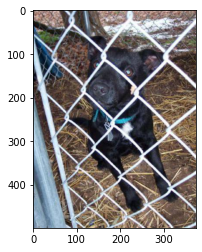

[1.]


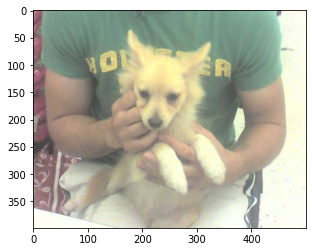

[0.]


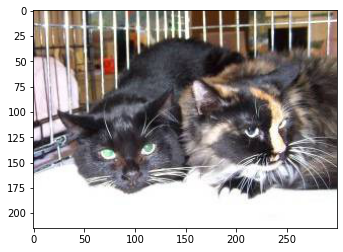

[1.]


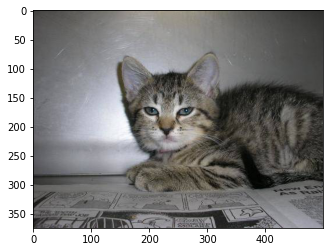

[1.]


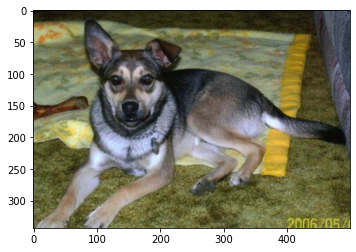

[1.]


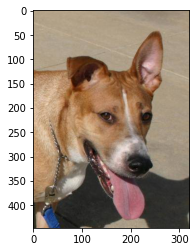

[0.]


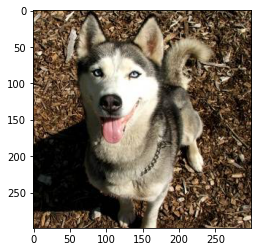

[0.]


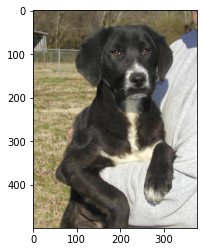

[1.]


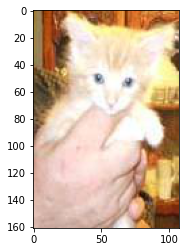

[0.]


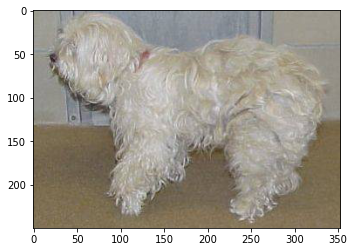

[0.]


In [28]:
test_path = pathlib.Path('./test/images')
paths = [str(f) for f in test_path.glob('*')]
for path, pred in list(zip(paths, np.round(predictions)))[:10]:
  plt.imshow(Image.open(path))
  plt.show()
  print(pred)

In [29]:
def extract_test_id(path):
   file = path.split('/')[1]
   return file.split('.')[0]

test_ids = [extract_test_id(f) for f in test_data_gen.filenames]

In [30]:
zipped = zip(test_ids, np.round(predictions.flatten()))
records = sorted(list(zipped), key=lambda kv: int(kv[0]))

In [31]:
output = pd.DataFrame.from_records(records, columns=['id', 'label'])
output.to_csv('submission.csv', index=False)